In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
Data=pd.read_csv("titanic_data.csv")

In [3]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
Data.shape

(891, 12)

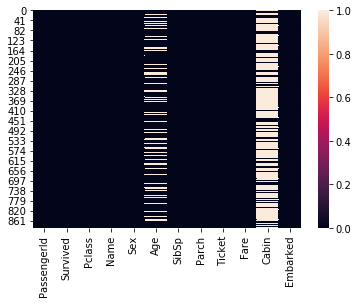

In [7]:
sb.heatmap(Data.isnull())

In [8]:
Data.drop('Cabin',axis = 1, inplace = True)

In [9]:
Data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
Data.Age.fillna(value = 28.0, inplace = True)

In [11]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


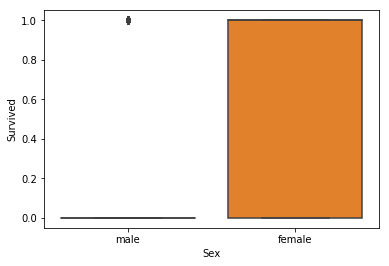

In [12]:
sb.boxplot(x = 'Sex', y = 'Survived', data = Data)

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

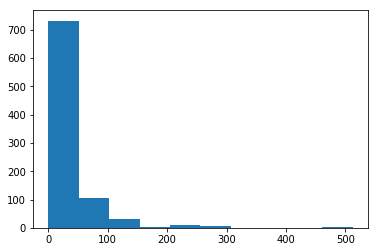

In [13]:
plt.hist(Data.Fare)

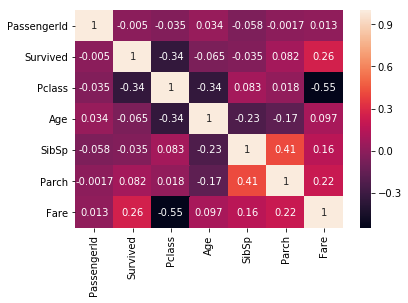

In [14]:
sb.heatmap(Data.corr(), annot = True )

In [15]:
Data.dropna(inplace=True)

In [16]:
sex = pd.get_dummies(Data['Sex'],drop_first=True)
embark = pd.get_dummies(Data['Embarked'],drop_first=True)

In [17]:
Data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [19]:
Data= pd.concat([Data,sex,embark],axis=1)

In [21]:
Data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(Data.drop('Survived',axis=1),Data['Survived'],test_size=0.20,random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression

In [29]:
lg = LogisticRegression()
model_lg = lg.fit(X_train,y_train).predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn import metrics

In [31]:
confusion_matrix(y_test,model_lg)

array([[99,  8],
       [26, 45]], dtype=int64)

In [35]:
RMSE_lg = np.sqrt(mean_squared_error(y_test,model_lg))
RMSE_lg*100

43.70483222197017

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [38]:
model_dtr = dtr.fit(X_train,y_train).predict(X_test)

In [40]:
RMSE_dtr = np.sqrt(mean_squared_error(y_test,model_dt))
RMSE_dtr*100

43.70483222197017

In [41]:
confusion_matrix(y_test,model_dt)

array([[92, 15],
       [19, 52]], dtype=int64)